# Q-SITE 2024: IBM Quantum Hackathon

## Lab 1: First Steps

Welcome to the IBM Quantum Hackathon at Q-SITE 2024!

IBM has created a series of coding challenges for you to work through. Each of these "labs" centers on a different topic. The problems contained in each lab will progressively increase in difficulty. To complete these labs, you will need to know about coding in the Python language. Each lab will contain a mixture of tutorial content and pre-written code blocks, and challenge code blocks where you will need to fill in your own Qiskit code to solve the challenge. 

The code required to complete the exercises should be typed under the line which has the `## WRITE YOUR CODE BELOW HERE ##` comment. Avoid making changes to any provided code as this could alter how other code in the notebook functions. You will submit answers to the grader methods that are called in this notebook. This lab has 3 graded exercises.

Before you can start working with Qiskit and these lab notebooks, you will need a computing environment in which to code and run the notebooks. You have a couple of options:
- Install Qiskit and the Qiskit Runtime client locally on your computer along with Jupyter notebooks. See here for instructions: https://docs.quantum.ibm.com/guides/install-qiskit
- Use an online coding notebook environment (e.g. Colab, qBraid). You may need to install Qiskit from within notebook cells using the `!pip install qiskit qiskit_ibm_runtime` command.

You will also need an account on the IBM Quantum Platform: https://quantum.ibm.com/ . Sign-up for free to run quantum circuits on real hardware available from our open-access quantum computers in the cloud. You'll be provided with up to 10 minutes per month of quantum runtime on the open access systems.

Documentation for Qiskit can be found here: https://docs.quantum.ibm.com/. 

In this first introductory lab, you will take your first steps on using Qiskit to compose quantum algorithms to solve problems. 

In [9]:
from grader.qsite24_ibm_grader import *

### Part 1: Your first circuit

A good first circuit to construct is one that creates a Bell state. It demonstrates two quantum principles that are necessary for quantum computing: superposition and entanglement. You can find more information here: https://en.wikipedia.org/wiki/Bell_state. Here is the circuit:

<center>
<img src=https://upload.wikimedia.org/wikipedia/commons/f/fc/The_Hadamard-CNOT_transform_on_the_zero-state.png>
</center>

For this exercise, build a circuit that prepares the 2-qubit Bell state $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$. The ```QuantumCircuit``` class in Qiskit is our starting point. To create a quantum circuit object, call the ```QuantumCircuit()``` with the number of qubits and number of classical bits to include. The following methods in ```QuantumCircuit``` will be helpful:
- ```QuantumCircuit.h(qubit)```: adds a Hadamard (H) gate to the indicated qubit.
- ```QuantumCircuit.cx(control, target)```: adds a Controlled NOT (CNOT or CX) gate with the given control qubit and target qubit.

You'll also need to measure the value of the qubits at the end of the circuit and store those measured values into the classical bits of the circuit. For this, use the ```QuantumCircuit.measure()``` method.

In [10]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2, 2)

## WRITE YOUR CODE BELOW HERE ##

# apply H gate on first qubit
qc.h(0)

# apply CNOT gate with first qubit as control and second qubit as target
qc.cx(0, 1)

# measure both qubit and store result in classical bits
qc.measure([0,1], [0,1])

# The following line draws your circuit in the notebook
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

Given that this is a small circuit with only two qubits, we can run the circuit using a classical simulator. Qiskit 1.x provides simulators that run locally on your computer. These are implementations of the Primitives, basic programs in Qiskit that facilitate execution of your quantum circuits. There are two basic Primitives in Qiskit: 1) ```Sampler```, and 2) ```Estimator```. For now, let's focus on the ```Sampler```. This primitive can run a single circuit or a set of circuits, then return the results as a set of measured bitstrings. The ```Sampler``` will run your circuit multiple times, what is refered to as "shots". Because of the principles of quantum mechanics, we need to run the circuit multiple times to see all of the possible outcomes since any single circuit execution will only give one possible outcome.

Starting in Qiskit 1.0, a new version of the Primitive programs was introduced, for now called the "V2" primitives. This introduced a new execution interface and new format for returning results from a set of executions. Circuits must be encapsulated within a ***Primitive Unified Block (PUB)***, basically a Python tuple containing the circuit and any parameters that go along with them. The ```run()``` function of the primitive then takes in an array of PUBs and executes each one. Results from execution are returned as a list containing one element for each PUB that was submitted.

Qiskit 1.0 introduced new local simulators based on the new V2 primitives called ```StatevectorSampler``` and ```StatevectorEstimator```. You can use the ```StatevectorSampler``` to execute your Bell state circuit as in the following code cell.

In [11]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()
pub = (qc)
job = sampler.run([pub], shots=1024)

To get the results of the execution from the returned ```job```, use the following code. Note that the ```result``` object is an list of results, one for each PUB. Since we only submitted one PUB to the ```sampler```, there is only one item in ```result``` at index ```0```. That item is a ```SamplerPubResult``` object that contains a ```data``` field, which in turn contains the measured results. Note that the circuit constructed for the Bell state contains a classical register called ```c```, which is contained within the ```data``` field. From ```c```, you can retrieve the number of times each outcome bitstring was measured using the ```get_counts()``` function.

In [12]:
result = job.result()
counts = result[0].data.c.get_counts()
counts

{'11': 525, '00': 499}

In [13]:
# SUBMIT JOB RESULT TO GRADER
qsite24_grader_lab1ex1(result)

Congratulations! 🎉 Your answer is correct.


### Part 2: A more complex circuit - half-adder

Let's build a more complicated quantum circuit: a half-adder. This circuit will add two 1-bit numbers together, ```a``` and ```b```, and produce a ```sum``` bit and a ```carry``` bit. This is a common circuit in classical digital computers, but here you will create the quantum version. The truth table for this circuit is as follows:

| a | b | sum | carry |
|---|---|-----|-------|
| 0 | 0 | 0   | 0     |
| 1 | 0 | 1   | 0     |
| 0 | 1 | 1   | 0     |
| 1 | 1 | 0   | 1     |

As quantum circuits get more complex, it is useful to organize the qubits and classical bits to make the code more readable. Qiskit provides the ```QuantumRegister``` and ```ClassicalRegister``` classes that can help with this. A register is a grouping of one or more qubits/bits. In the following code you can use to create the half-adder circuit, registers are created for the input qubits ```a``` and ```b```, the output qubits ```sum``` and ```carry```, and classical bits ```c_sum``` and ```c_carry``` for the measurements. These registers are then added to a new ```QuantumCircuit``` object. 

In [14]:
from qiskit import QuantumRegister, ClassicalRegister

q_a = QuantumRegister(1, name='a')
q_b = QuantumRegister(1, name='b')
q_sum = QuantumRegister(1, name='sum')
q_carry = QuantumRegister(1, name='carry')

c_sum = ClassicalRegister(1, name='c_sum')
c_carry = ClassicalRegister(1, name='c_carry')

qc_adder = QuantumCircuit(q_a, q_b, q_sum, q_carry, c_sum, c_carry)

qc_adder.draw()

a: 
           
        b: 
           
      sum: 
           
    carry: 
           
  c_sum: 1/
           
c_carry: 1/

#### EXERCISE 2a

Using the initial registers and circuit created above, build a circuit that implements the half-adder. 

With the qubits and classical bits organized into registers, you now need only specify the qubits and classical bits by their Python variables names instead of by the qubit number or classical bit number when adding quantum gates to the circuit. For instance,

```
qc_example.cx(q_reg1, q_reg2)
```

To build the circuit, the following method implementing a double-controlled NOT gate will be useful:

- ```QuantumCircuit.ccx(control1, control2, target)```: adds a double-controlled NOT gate (aka Toffoli gate) with two control qubits and a target qubit. Note that you could also use the ```QuantumCircuit.mcx()```, which implements a multi-controlled NOT gate which can take an arbitrary number of control qubits.

Be sure to measure the ```sum``` and ```carry``` qubits into the given corresponding classical registers.

In [15]:
## WRITE YOUR CODE BELOW HERE ##

# use CNOT to compute sum
qc_adder.cx(q_a, q_sum)
qc_adder.cx(q_b, q_sum)

# use toffoli to compute carry bit 
qc_adder.ccx(q_a, q_b, q_carry)

# store the results into classical bits
qc_adder.measure(q_sum, c_sum)
qc_adder.measure(q_carry, c_carry)

qc_adder.draw()

a: ──■─────────■────────
             │         │        
        b: ──┼────■────■────────
           ┌─┴─┐┌─┴─┐  │  ┌─┐   
      sum: ┤ X ├┤ X ├──┼──┤M├───
           └───┘└───┘┌─┴─┐└╥┘┌─┐
    carry: ──────────┤ X ├─╫─┤M├
                     └───┘ ║ └╥┘
  c_sum: 1/════════════════╩══╬═
                           0  ║ 
c_carry: 1/═══════════════════╩═
                              0

Now run your circuit and get the result using the following code. The ```data``` field of the ```result``` object will be printed out. Note that that there are two items in the contained data: ```c_sum``` and ```c_carry```, which correspond to the classical registers that were defined.

In [16]:
sampler = StatevectorSampler()
pub = (qc_adder)
job = sampler.run([pub], shots=1024)
result = job.result()
result[0].data.items()

dict_items([('c_sum', BitArray(<shape=(), num_shots=1024, num_bits=1>)), ('c_carry', BitArray(<shape=(), num_shots=1024, num_bits=1>))])

You can work with these data items and read out the data they contain. Below, the code prints out the measurement counts.

In [17]:
print('c_sum:  ', result[0].data.c_sum.get_counts())
print('c_carry:', result[0].data.c_carry.get_counts())

c_sum:   {'0': 1024}
c_carry: {'0': 1024}


In [18]:
## SUBMIT CIRCUIT TO GRADER
qsite24_grader_lab1ex2a(qc_adder)

Congratulations! 🎉 Your answer is correct.


As you should see, the output for the sum and carry registers is always 0. This makes sense given the truth table above and the fact that all qubits in the circuit are initialized in state 0 by default at the beginning of the execution.

#### EXERCISE 2b

Now, let's see what happens when the input is changed. For this next task, create a quantum circuit that changes the value of the inputs such that ```a=1``` and ```b=1```. The following method for the X gate will be useful:

- ```QuantumCircuit.x(qubit)```: adds an X-gate to the given qubit. The X-gate flips the state of the qubit from 0 to 1, or from 1 to 0.

In [19]:
qc_adder_in = QuantumCircuit(q_a, q_b)

## WRITE YOUR CODE BELOW HERE ##

# apply X gate to flip the bit 
qc_adder_in.x(q_a)
qc_adder_in.x(q_b)

qc_adder_in.draw()


┌───┐
a: ┤ X ├
   ├───┤
b: ┤ X ├
   └───┘

Now we have two quantum circuits: one that implements the half-adder, and the other that sets the input values. These circuits can be combined by using the ```compose()``` method. In the code below, the ```qc_adder_in``` circuit is placed in front of the original ```qc_adder``` circuit, which creates a new circuit object ```qc_adder_new```.

In [20]:
qc_adder_new = qc_adder.compose(qc_adder_in, front=True)
qc_adder_new.draw()

┌───┐                     
        a: ┤ X ├──■─────────■────────
           ├───┤  │         │        
        b: ┤ X ├──┼────■────■────────
           └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
      sum: ─────┤ X ├┤ X ├──┼──┤M├───
                └───┘└───┘┌─┴─┐└╥┘┌─┐
    carry: ───────────────┤ X ├─╫─┤M├
                          └───┘ ║ └╥┘
  c_sum: 1/═════════════════════╩══╬═
                                0  ║ 
c_carry: 1/════════════════════════╩═
                                   0

Now run the circuit using the code below. What is the output? Is it consistent with the truth table? If so, submit the result object to the grader.

In [21]:
sampler = StatevectorSampler()
pub = (qc_adder_new)
job = sampler.run([pub], shots=1024)
result = job.result()
print('c_sum:  ', result[0].data.c_sum.get_counts())
print('c_carry:', result[0].data.c_carry.get_counts())

c_sum:   {'0': 1024}
c_carry: {'1': 1024}


In [22]:
# SUBMIT result OBJECT FOR a=1 and b=1
qsite24_grader_lab1ex2b(result)

Congratulations! 🎉 Your answer is correct.


### Part 3 - Executing circuits on real hardware

So far, you have been using the local classical simulator to execute quantum circuits on your computer. While it is fine to run small circuits small circuits with just a few qubits on a simulator, it would be increasingly difficult to execute much larger circuits with many more qubits in a simulator. Generally, for each qubit added to a circuit, the memory needed to simulate the circuit on a classical computer doubles. This is one of the reasons why real quantum computing hardware is needed: to run circuits that are too large to simulate on a classical machine.

In this particular lab, you will run your Bell state circuit on a real quantum processor from IBM! To facilitate this, use the Qiskit Runtime client package that you installed. The key class you'll need is the ```QiskitRuntimeService```, which is imported below.

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService

To access systems in the IBM Quantum Platform, you'll need your account information. Log into your account at https://quantum.ibm.com and look for the "API token" on the Dashboard page. Copy this token and paste it into the following code cell in place of "<MY_IBM_QUANTUM_TOKEN>". The ```save_account()``` method of the ```QiskitRuntimeService``` class will save the token onto a configuration file on your computer, which will then be picked up by other methods of the Qiskit Runtime client package automatically so that you don't have to input the API token over again. **We advise you to then delete your token from this notebook (or remove the following cell entirely) so that you don't accidentally give away your access token to someone else.**

Once your account information is set, a service object can be created and the list of actual systems or "backends" available can be printed as shown in the following cell.

In [6]:
service = QiskitRuntimeService(channel="ibm_quantum")
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

You can choose any of these backends. At time of writing, all of these systems contain one of IBM's 127-qubit Eagle R3 quantum processors. The code below plots the layout of the qubits for this processor. We suggest that you select a system that is less busy than others. You can view how many pending jobs have been submitted to the queuing system for each quantum computer by visiting here: https://quantum.ibm.com/services/resources?view=table

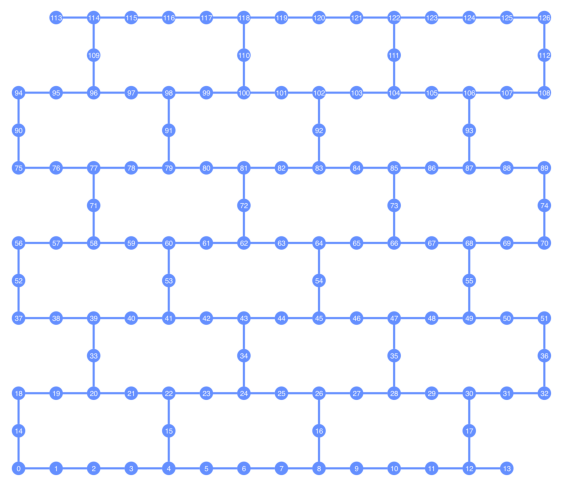

In [7]:
from qiskit.visualization import plot_gate_map

backend = service.backend('ibm_sherbrooke')
plot_gate_map(backend, figsize=(7, 7), font_size=14)

**Transpiling**: Before you can submit a circuit to a real quantum processor, it first needs to be translated into a form that can be run on the actual hardware. This is because the actual hardware only implements a subset of quantum gates referred to as **basis gates**. Gates you use when building your circuits are translated into their equivalent sequences of basis gates as part of the **transpilation** process. Note that different processor models, generations, and system may implement slightly different sets of basis gates, so your circuits must be transpiled for a specific backend system. The code below shows how to use the ```transpile``` method in Qiskit to translate the circuit.

In [23]:
from qiskit import transpile

qc_transpiled = transpile(qc, backend)
qc_transpiled.draw(idle_wires=False)

global phase: 7π/4
          ┌────────┐ ┌────┐          ┌──────┐┌──────────┐┌────┐┌─────────┐┌─┐»
q_0 -> 0 ─┤ Rz(-π) ├─┤ √X ├──────────┤1     ├┤ Rz(-π/2) ├┤ √X ├┤ Rz(π/2) ├┤M├»
         ┌┴────────┴┐├────┤┌────────┐│  Ecr │├─────────┬┘├────┤├─────────┤└╥┘»
q_1 -> 1 ┤ Rz(-π/2) ├┤ √X ├┤ Rz(-π) ├┤0     ├┤ Rz(π/2) ├─┤ √X ├┤ Rz(π/2) ├─╫─»
         └──────────┘└────┘└────────┘└──────┘└─────────┘ └────┘└─────────┘ ║ »
    c: 2/══════════════════════════════════════════════════════════════════╩═»
                                                                           0 »
«            
«q_0 -> 0 ───
«         ┌─┐
«q_1 -> 1 ┤M├
«         └╥┘
«    c: 2/═╩═
«          1

As you can see, any H or CNOT gate that you implemented in your circuit has been translated into several basis gates. 

Next, you will execute the transpiled circuit on real hardware. We again use the ```Sampler``` primitive, but this time from the ```qiskit_ibm_runtime``` package. Note that the "V2" version of the ```Sampler``` is used, which is more current. When the ```run()``` method is execute, your transpiled circuit is sent to the IBM Quantum Platform and into the job queue for the backend system you chose.

In [24]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend)
pub = (qc_transpiled)
job = sampler.run([pub], shots=1024)
print("Job ID:", job.job_id())

Job ID: cvs2bfd55th0008rw5b0


Depending on how busy the system is, it may take a few minutes for your circuit to be executed on the real hardware. You can monitor the status of your job from your Web dashboard on the IBM Quantum Platform here: https://quantum.ibm.com/workloads (look for the job ID printed above). The job status can also be retrieved by executing the line in the following code cell.

In [27]:
job.status()

'DONE'

Once you see that the job is in the "DONE" state, you can retrieve the results same as before from the job object.

In [28]:
result = job.result()
counts = result[0].data.c.get_counts()
counts

{'00': 477, '11': 494, '01': 45, '10': 8}

Do you notice anything different about the results when running on real hardware versus the local simulator? You'll likely see that there are additional values measured on the real hardware. This is the result of noise and errors in the real hardware. However, these additional values should be small relative to the expected values for the Bell state, so in this case we can ignore those results.

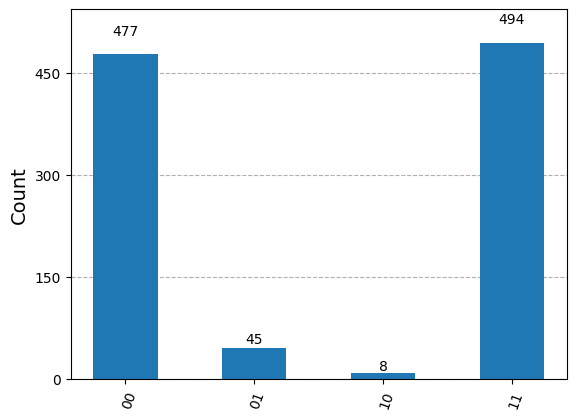

In [29]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

### Congratulations!

You have made it to the end of the first lab. Here is a summary of what you learned about Qiskit in this lab:

- creating a quantum circuit
- basic quantum gates such as X, H, and CNOT
- running a quantum circuit using a local simulator and real hardware

With these learnings, you are ready to tackle challenges in the next labs. All the best!